# Set 1, Problem 4

## Cluster Color Magnitude Diagram

The goal of this problem is to make a color magnitude diagram for M67, a nearby open cluster, using
Gaia data.

### (a) Determine the location of M67 using public tools.

Note that you can also just resolve "M67" in the Gaia archive search. 
From the SIMBAD database (http://simbad.u-strasbg.fr/simbad/sim-fid):

In [1]:
# Coordinates (ICRS)
ra_m67 = '08 51 18.0'
dec_m67 = '+11 48 00'

# Angular size (arcmin)
d_m67 = 25.0

### (b) Download a list of stars near M67.

Download from the Gaia archive at https://gea.esac.esa.int/archive/. Make sure you download all the necessary data for the steps below. You'll need the following: ra, dec, parallax, pmra, pmdec, phot_g_mean_mag, bp_rp, a_g_val, e_bp_min_rp_val (the last two are for extinction corrections)

I've saved all stars within a radius of 12.5 arcmin of M67's coordinates to a file called 'gaia_result.csv'

In [2]:
# Load the file with data
import pandas as pd
import numpy as np

data = pd.read_csv('gaia_result.csv')

Let's clean up the data a little before we plot anything.

In [3]:
# Get rid of any stars that don't have all the measurements we need
data = data[~np.isnan(data['parallax'])]
data = data[~np.isnan(data['phot_g_mean_mag'])]

# In case we want to consider reddening/extinction
'''
data = data[~np.isnan(data['a_g_val'])]
data = data[~np.isnan(data['e_bp_min_rp_val'])]
'''

"\ndata = data[~np.isnan(data['a_g_val'])]\ndata = data[~np.isnan(data['e_bp_min_rp_val'])]\n"

### (c) Plot a histogram to determine a rough estimate of M67’s distance.

In [4]:
import matplotlib.pyplot as plt

# Compute average and standard dev of a quantity (weight by the inverse variance)
def compute_avg(values, error):
    avg = np.average(np.asarray(values), weights=1./np.power(error,2.))
    std = np.sqrt(np.cov(np.asarray(values), aweights=1./np.power(error,2.)))
    print('Average: '+"{0:.2f}".format(avg)+' +/- '+"{0:.2f}".format(std))
    return avg, std
    
parallax_avg, parallax_std = compute_avg(data['parallax'], data['parallax_error'])

# Make plot
plt.hist(data['parallax'], bins=25)
plt.axvline(parallax_avg, color='r', linestyle='--')
plt.axvspan(parallax_avg - 2.*parallax_std, parallax_avg + 2.*parallax_std, color='r', alpha=0.2)
plt.xlabel('Parallax (milliarcsec)')
plt.ylabel('N')

Average: 1.16 +/- 0.52


Text(0, 0.5, 'N')

First let's estimate the distance to M67 based on its parallax, using d = (1 AU)/parallax. (Note that in actual science cases, this is NOT the best way to get distances from Gaia! But it's fine for our purposes here.)

In [5]:
dist_pc = 1./(parallax_avg/1000.)
print('Distance: '+"{0:.2f}".format(dist_pc)+' pc')

Distance: 860.70 pc


Let's decide how many stars to throw out. Start with a simple +/- 2 sigma (95%) cut:

In [6]:
data1 = data[data['parallax'] > (parallax_avg - 2.*parallax_std)]
data1 = data1[data1['parallax'] < (parallax_avg + 2.*parallax_std)]

### (d) Further select M67 stars by plotting the proper motions of the selected stars.

Average: -9.91 +/- 3.53
Average: -3.16 +/- 3.04


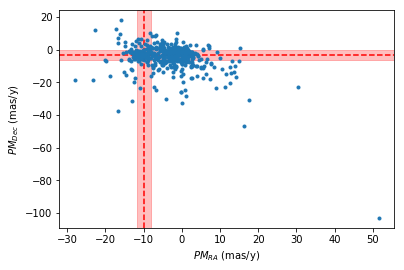

In [7]:
# Compute average and standard dev of RA pm (weight by the inverse variance)
pmra_avg, pmra_std   = compute_avg(data1['pmra'], data1['pmra_error'])
pmdec_avg, pmdec_std = compute_avg(data1['pmdec'], data1['pmdec_error'])

'''
plt.hist(data1['pmra'], bins=25)
plt.axvline(pmra_avg, color='r', linestyle='--')
plt.axvspan(pmra_avg - 0.5*pmra_std, pmra_avg + 0.5*pmra_std, color='r', alpha=0.25)
plt.xlabel(r'$PM_{RA}$ (mas/y)')
plt.ylabel('N')
plt.show()
'''

# Plot proper motions
plt.errorbar(data1['pmra'], data1['pmdec'], marker='.', linestyle='None')
plt.axvline(pmra_avg, color='r', linestyle='--')
plt.axvspan(pmra_avg - 0.5*pmra_std, pmra_avg + 0.5*pmra_std, color='r', alpha=0.25)
plt.axhline(pmdec_avg, color='r', linestyle='--')
plt.axhspan(pmdec_avg - 1.*pmdec_std, pmdec_avg + 1.*pmdec_std, color='r', alpha=0.25)
plt.xlabel(r'$PM_{RA}$ (mas/y)')
plt.ylabel(r'$PM_{Dec}$ (mas/y)')
plt.show()

Let's decide how many stars to throw out. Start with a simple +/- 0.5 sigma cut on pmra and a +/- 1 sigma cut on pmdec (a slightly stricter cut than on parallax, in an attempt to avoid contamination):

In [8]:
data2 = data1[data1['pmra'] > (pmra_avg - 0.5*pmra_std)]
data2 = data2[data2['pmra'] < (pmra_avg + 0.5*pmra_std)]

data2 = data2[data2['pmdec'] > (pmdec_avg - 1.*pmdec_std)]
data2 = data2[data2['pmdec'] < (pmdec_avg + 1.*pmdec_std)]

### (e) Plot a color-magnitude diagram.

Remember that we have to convert apparent magnitude to absolute magnitude, and we have to account for extinction.

The history saving thread hit an unexpected error (OperationalError('unable to open database file')).History will not be written to the database.


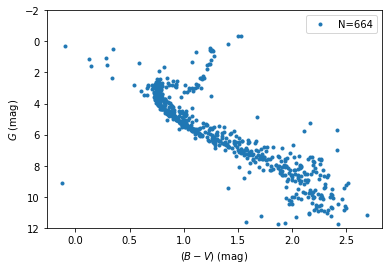

In [11]:
# Convert G magnitude to absolute magnitude (accounting for extinction)
g = data2['phot_g_mean_mag'] + 5. - 5.*np.log10(1000./data2['parallax']) #- data2['a_g_val']
'''
# Correct B-R for reddening
br = data2['bp_rp'] - data2['e_bp_min_rp_val']
'''
#g = data2['phot_g_mean_mag']
br = data2['bp_rp']

plt.plot(br, g, marker='.', linestyle='None', label='N='+str(len(data2['bp_rp'])))
plt.xlabel(r'$(B-V)$ (mag)')
plt.ylabel(r'$G$ (mag)')
plt.ylim(12,-2)
plt.legend(loc='best')